  Obtaining dependency information for streamlit_folium from https://files.pythonhosted.org/packages/9a/dc/16c5174ec63316bb0a7f933967a6a1919306d0ad655aceea19778de21047/streamlit_folium-0.15.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/449.0 kB ? eta -:--:--
   ------------------------- -------------- 286.7/449.0 kB 8.9 MB/s eta 0:00:01
   ---------------------------------------- 449.0/449.0 kB 5.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
#importeer packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math 
from datetime import datetime
import streamlit as st
import plotly.subplots
import plotly.graph_objs as go
import numpy as np
import plotly.express as px
from sodapy import Socrata
from sklearn.linear_model import LinearRegression
from PIL import Image
from IPython.display import display  # Alleen voor gebruik in Jupyter Notebook
import folium
from streamlit_folium import st_folium

In [4]:
#inladen en cleanen data elektrische auto's
df = pd.read_csv("Elektrische_Auto_s_2022.csv")

def float_to_datetime(float_date):
    if not math.isnan(float_date):  # Controleer op NaN-waarden
        date_str = str(int(float_date))
        return datetime.strptime(date_str, '%Y%m%d')
    else:
        return None  # Als het een NaN-waarde is, retourneer None

# Gebruik de 'apply' functie om de hele kolom om te zetten
df['Datum tenaamstelling'] = df['Datum tenaamstelling'].apply(float_to_datetime)

selected_columns = ['Kenteken', 'Merk', 'Catalogusprijs','Inrichting','Massa rijklaar', 'Datum tenaamstelling']
selected_df = df[selected_columns] 
cleaned_df = selected_df.dropna()



duplicaten_mapping = {
    'TESLA MOTORS': 'TESLA',
    'VW': 'VOLKSWAGEN',
    'POSSL': 'POESSL',
    'M.A.N.': 'MAN',
    'BMW I': 'BMW'
}
cleaned_df.loc[:, 'Merk'] = cleaned_df['Merk'].replace(duplicaten_mapping)
cleaned_df['Catalogusprijs'] = cleaned_df['Catalogusprijs'].astype(int)




C:\Users\henri\AppData\Local\Temp\ipykernel_28064\1358930316.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.loc[:, 'Merk'] = cleaned_df['Merk'].replace(duplicaten_mapping)
C:\Users\henri\AppData\Local\Temp\ipykernel_28064\1358930316.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Catalogusprijs'] = cleaned_df['Catalogusprijs'].astype(int)


In [5]:
# Lijst met alle merken
alle_merken = cleaned_df.Merk.unique()

# Aggregeer de gegevens om het aantal auto's per merk per datum te krijgen
agg_df = df.groupby(['Datum tenaamstelling', 'Merk']).size().reset_index(name='aantal_auto_s')

# Voeg cumulatieve som toe aan de dataset
agg_df['cumulatief'] = agg_df.groupby('Merk')['aantal_auto_s'].cumsum()

# Maak een lijndiagram met Plotly en stel de kleuren in
fig = px.line(agg_df, x='Datum tenaamstelling', y='cumulatief', color='Merk',
              color_discrete_sequence=px.colors.qualitative.Set3)

# Voeg een checkbox toe om merken te selecteren
updatemenu = [{'label': merk, 'method': 'relayout', 'args': [{'showlegend': [True if col == merk else False for col in agg_df['Merk']]}]} for merk in alle_merken]

fig.update_layout(
    updatemenus=[
        dict(
            buttons=updatemenu,
            direction="down",
            showactive=True,
        ),
    ]
)

# Toon het diagram
# fig.show()

st.title('Cumulatieve verkoop per merk elektrische auto in één jaar')
#Streamlit
st.plotly_chart(fig)

2023-10-12 16:53:18.575 
  command:

    streamlit run C:\Users\henri\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [102]:
# Groepeer de gegevens op automerk en bereken het gemiddelde van de prijzen
mean_price = cleaned_df.groupby('Merk')['Catalogusprijs'].mean().reset_index()

st.title('Gemiddelde catalogusprijs elektrische auto per merk (2022)')

# Maak een barplot met Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(mean_price['Merk'], mean_price['Catalogusprijs'])
plt.xlabel('Automerk')
plt.ylabel('Gemiddelde Prijs')
plt.title('Gemiddelde Prijs per Automerk')
plt.xticks(rotation=90)

# plt.show()
#voor streamlit
st.pyplot(plt)

DeltaGenerator()

In [6]:

# Initialize the Socrata client with your domain and app_token.
app_token = "YOUR_APP_TOKEN"
client = Socrata("opendata.rdw.nl", 'u0zsoHImNyJXaoYGhe3ECdEuo')

# Specify the resource ID for the dataset you want to access.
resource_id = "m9d7-ebf2"

# Fetch the data from the API using the client's `get` method.
# You can specify additional parameters like limit, where, etc., as needed.
results = client.get(resource_id, limit=100000)

# Convert the results into a Pandas DataFrame.
dfvoertuig = pd.DataFrame.from_records(results)

In [7]:
#selecteer de variabelen
dfvoertuigsel = dfvoertuig[['kenteken', 'merk','datum_eerste_tenaamstelling_in_nederland_dt']]

C:\Users\henri\AppData\Local\Temp\ipykernel_28064\2863903259.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\henri\AppData\Local\Temp\ipykernel_28064\2863903259.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 640x480 with 0 Axes>

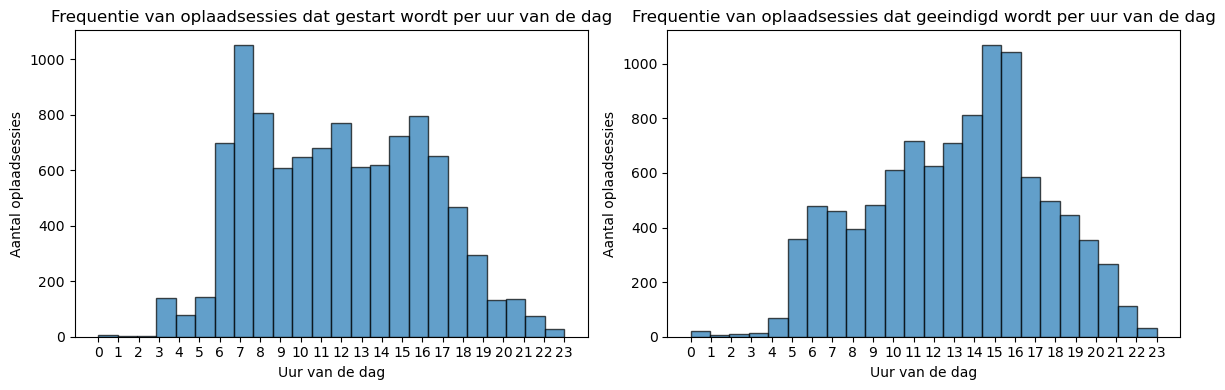

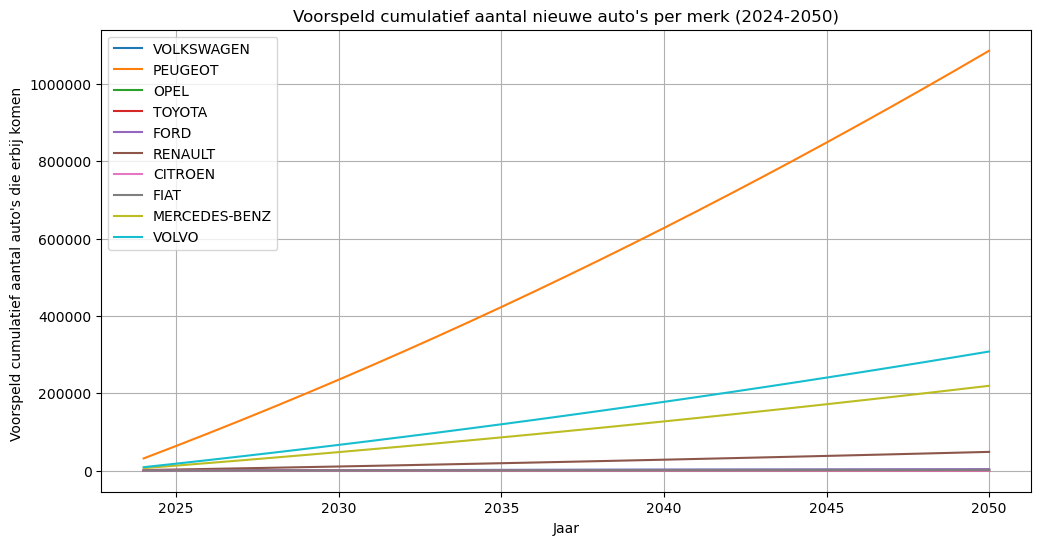

DeltaGenerator()

In [18]:
dfvoertuigsel = dfvoertuig[['kenteken', 'merk','datum_eerste_tenaamstelling_in_nederland_dt']]
dfvoertuigsel['datum_eerste_tenaamstelling_in_nederland_dt'] = pd.to_datetime(dfvoertuigsel['datum_eerste_tenaamstelling_in_nederland_dt'])
dfvoertuigsel['year'] = dfvoertuigsel['datum_eerste_tenaamstelling_in_nederland_dt'].dt.year
dfvoertuigsel = dfvoertuigsel.dropna()
merk_per_jaar = dfvoertuigsel.groupby(['year', 'merk']).size().reset_index(name='aantal')
# Group the data by year and brand to calculate the total number of cars added per year for each brand
grouped_data = merk_per_jaar.groupby(['year', 'merk'])['aantal'].sum().reset_index()

# Create a pivot table to reshape the data for multi-linear regression
pivot_data = grouped_data.pivot(index='year', columns='merk', values='aantal').fillna(0)

brands_to_predict = ['VOLKSWAGEN', 'PEUGEOT', 'OPEL', 'TOYOTA', 'FORD', 'RENAULT', 'CITROEN', 'FIAT', 'MERCEDES-BENZ', 'VOLVO']

# Filter the pivot_data to only include the selected car brands
filtered_pivot_data = pivot_data[brands_to_predict]

# Initialize the linear regression model
model = LinearRegression()

# Fit the multi-linear regression model for the selected car brands
X = np.array(filtered_pivot_data.index).reshape(-1, 1)
y = filtered_pivot_data.values
model.fit(X, y)

# Fit the multi-linear regression model for the selected car brands
model.fit(X, filtered_pivot_data.values)

# Predict the number of cars added for the selected car brands in 2024
year_to_predict = 2024
predicted_values = model.predict([[year_to_predict]])



# Define the years for prediction (2024 to 2050)
years_to_predict = np.arange(2024, 2051)

# Predict the number of cars added for the selected car brands for each year
predicted_values = model.predict([[year] for year in years_to_predict])

# Create a dictionary to store the cumulative predictions for each brand
cumulative_predictions_dict = {brand: [] for brand in brands_to_predict}

for i, brand in enumerate(brands_to_predict):
    cumulative_prediction = 0
    for year, prediction in zip(years_to_predict, predicted_values[:, i]):
        cumulative_prediction += prediction * 100 # vermeningvuldig met 100 want sample is 100 keer zo klein als populatie
        cumulative_predictions_dict[brand].append(cumulative_prediction)

# Create a line plot for each brand's cumulative predictions
plt.figure(figsize=(12, 6))

for brand in brands_to_predict:
    plt.plot(years_to_predict, cumulative_predictions_dict[brand], label=brand)

plt.title("Voorspeld cumulatief aantal nieuwe auto's per merk (2024-2050)")
plt.xlabel('Jaar')
plt.ylabel("Voorspeld cumulatief aantal auto's die erbij komen ")
plt.legend()
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
st.title("Voorspelling cumulatief aantal nieuwe auto's per merk (2024-2050)")
plt.show()
st.pyplot(plt)

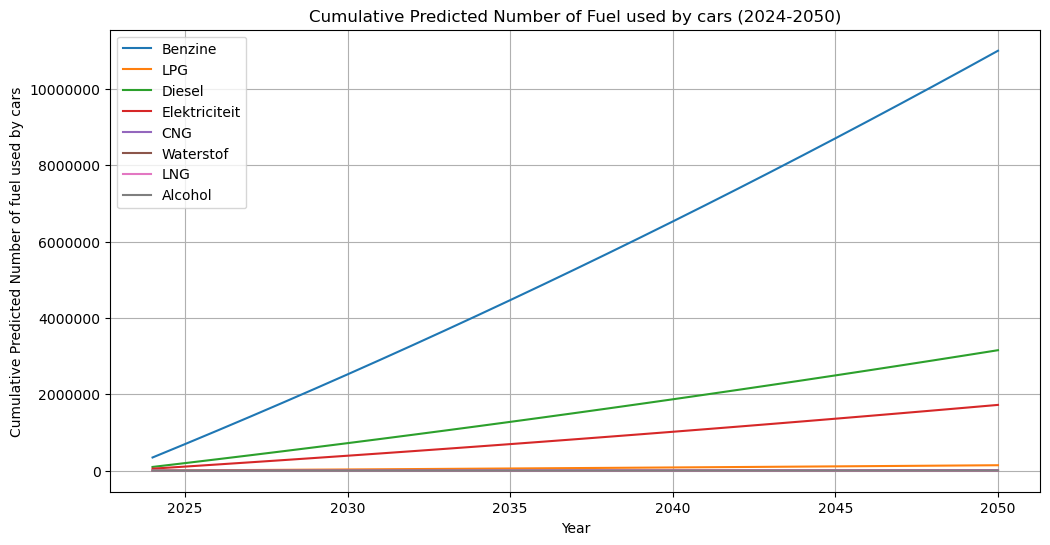

DeltaGenerator()

In [19]:
# Laad de afbeelding
afbeelding = Image.open("afbeeldingcumalatiefbrandstof.png")  
# Toon de afbeelding (alleen nodig in Jupyter Notebook)
display(afbeelding)
st.title("Voorspelling cumulatief brandstofverbruik auto's (2024-2050)")
st.image(afbeelding)

In [20]:
file = pd.read_csv('laadpaaldata.csv')
print(file.head())
#verwijder rijen met fouten datum
file = file.drop([1731,1732, 1733])
#haal negatieve waarde uit ChargeTime
file = file[file['ChargeTime'] >= 0]
# haal negatieve waarde uit ConnectedTime
file = file[file['ConnectedTime'] >= 0]

               Started                Ended  TotalEnergy  ConnectedTime  \
0  2018-01-01 08:45:26  2018-01-01 09:16:45         1830         0.5219   
1  2018-01-01 11:26:40  2018-01-01 14:36:13        28641         3.1592   
2  2018-01-01 12:39:28  2018-01-01 20:58:10        65534         8.3117   
3  2018-01-01 14:26:58  2018-01-02 06:36:55        10080        16.1658   
4  2018-01-01 14:50:05  2018-01-01 17:21:50         7180         2.5292   

   ChargeTime  MaxPower  
0      0.5219      3524  
1      2.3056     13680  
2      8.3117     11200  
3      4.3006      3360  
4      2.0656      3758  


<Figure size 640x480 with 0 Axes>

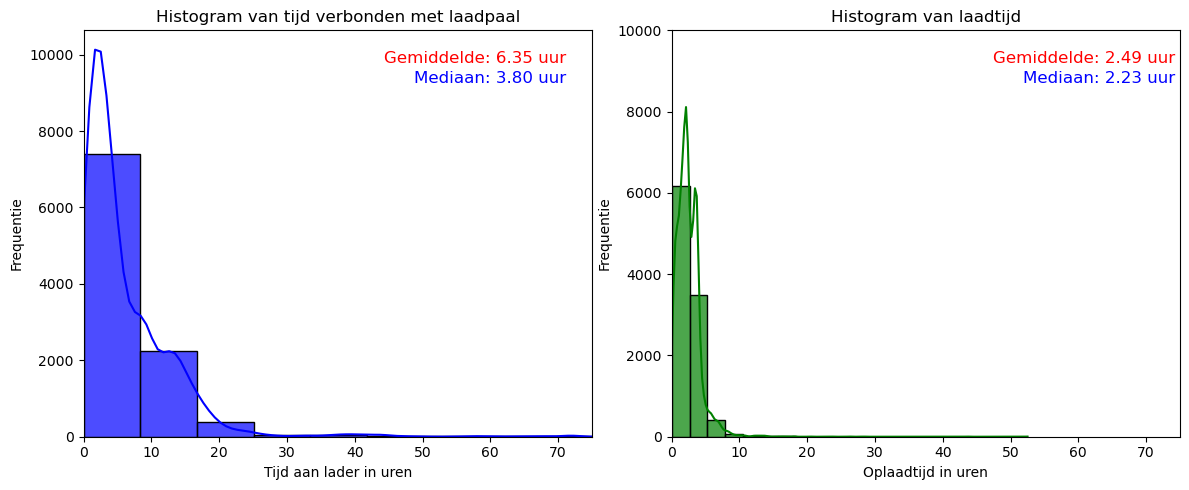

DeltaGenerator()

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bereken het gemiddelde en de mediaan voor ConnectedTime
gemiddelde_connected = np.mean(file['ConnectedTime'])
mediaan_connected = np.median(file['ConnectedTime'])
data_connected = file['ConnectedTime']

# Bereken het gemiddelde en de mediaan voor ChargeTime
gemiddelde_charge = np.mean(file['ChargeTime'])
mediaan_charge = np.median(file['ChargeTime'])
data_charge = file['ChargeTime']

# Bepaal het gemeenschappelijke x-asbereik voor beide subplots
x_axis_range = (0, 75)  

# Maak een subplot met 1 rij en 2 kolommen
plt.figure(figsize=(12, 5))

# Subplot 1: Histogram van ConnectedTime
plt.subplot(1, 2, 1)
sns.histplot(data=data_connected, bins=20, kde=True, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Tijd aan lader in uren')
plt.ylabel('Frequentie')
plt.title('Histogram van tijd verbonden met laadpaal')
plt.xlim(x_axis_range)
plt.text(0.95, 0.95, f'Gemiddelde: {gemiddelde_connected:.2f} uur', color='red', fontsize=12, transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.90, f'Mediaan: {mediaan_connected:.2f} uur', color='blue', fontsize=12, transform=plt.gca().transAxes, ha='right', va='top')

# Subplot 2: Histogram van ChargeTime
plt.subplot(1, 2, 2)
sns.histplot(data=data_charge, bins=20, kde=True, color='green', edgecolor='k', alpha=0.7)
plt.xlabel('Oplaadtijd in uren')
plt.ylabel('Frequentie')
plt.title('Histogram van laadtijd')
plt.xlim(x_axis_range)
plt.text(0.99, 0.95, f'Gemiddelde: {gemiddelde_charge:.2f} uur', color='red', fontsize=12, transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.99, 0.90, f'Mediaan: {mediaan_charge:.2f} uur', color='blue', fontsize=12, transform=plt.gca().transAxes, ha='right', va='top')

# Aanpassen van de ruimte tussen subplots
plt.tight_layout()

# Aanpassen van de y-as van de rechtergrafiek
plt.ylim(0, 10000)
plt.yticks([0, 2000, 4000, 6000, 8000, 10000])

# Toon het plot
plt.show()
st.title('Verdeling voor connectedtime en chargetime voor laadpalen')
st.pyplot(plt)

In [22]:
# Converteer kolommen naar datetime
file['Started'] = pd.to_datetime(file['Started'])
file['Ended'] = pd.to_datetime(file['Ended'])

# Maak subplots met 1 rij en 2 kolommen
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Aanpassen van de figsize naar wens

# Plot de eerste histogram (gestarte oplaadsessies)
axes[0].hist(file['Started'].dt.hour, bins=24, edgecolor='k', alpha=0.7)
axes[0].set_xlabel('Uur van de dag')
axes[0].set_ylabel('Aantal oplaadsessies')
axes[0].set_title('Frequentie van oplaadsessies dat gestart wordt per uur van de dag')
axes[0].set_xticks(range(0, 24))

# Plot de tweede histogram (geëindigde oplaadsessies)
axes[1].hist(file['Ended'].dt.hour, bins=24, edgecolor='k', alpha=0.7)
axes[1].set_xlabel('Uur van de dag')
axes[1].set_ylabel('Aantal oplaadsessies')
axes[1].set_title('Frequentie van oplaadsessies dat geeindigd wordt per uur van de dag')
axes[1].set_xticks(range(0, 24))


# Pas de afstand tussen subplots aan
plt.tight_layout()
#voeg streamlit titel toe
st.title('Vergelijking Start-en  Eindtijden van Oplaadsessies per uur van de dag')
# Toon de grafieken
st.pyplot(plt)


DeltaGenerator()

In [23]:
#read in csv and define grouped
api_df = pd.read_csv('ApiDataClean.csv')
grouped = api_df.groupby('AddressInfo.Town')

In [24]:
#define streamlit app page title
st.title('Laadpalen in Nederland')

#define big cities display
st.subheader('De grote steden')
big_cities = ['Amsterdam', 'Utrecht', 'Den Haag', 'Rotterdam']
for city in big_cities:
    amount = grouped.size().get(city, 0)
    st.write(f"Aantal laadpalen in {city}: {amount}")

#define town input feature
st.subheader('Laadpaal per plaats')
town = st.text_input('Vul een plaatsnaam in')
town_amount = grouped.size().get(town, 0)
st.write(f"Aantal laadpalen in {town}: {town_amount}")

In [25]:
#define Netherlands map display
st.subheader('Laadpalen op de kaart')

#make map of The Netherlands
m = folium.Map(location=[52.0893191, 5.1101691], zoom_start=7, tiles='openstreetmap', attr='openstreetmap')

#define custom tiles for preferences
folium.TileLayer(tiles='https://tiles.stadiamaps.com/tiles/outdoors/{z}/{x}/{y}{r}.{ext}', attr='&copy; <a href="https://www.stadiamaps.com/" target="_blank">Stadia Maps</a> &copy; <a href="https://openmaptiles.org/" target="_blank">OpenMapTiles</a> &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
                 ext='png', name='Stadia.Outdoors').add_to(m)
folium.TileLayer(tiles='https://tiles.stadiamaps.com/tiles/alidade_smooth/{z}/{x}/{y}{r}.{ext}', attr='&copy; <a href="https://www.stadiamaps.com/" target="_blank">Stadia Maps</a> &copy; <a href="https://openmaptiles.org/" target="_blank">OpenMapTiles</a> &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
                 ext='png', name='Stadia.AllidadeSmooth').add_to(m)
folium.LayerControl(collapsed=False).add_to(m)

#visualising all charging stations on map
for index, row in api_df.iterrows():
    popup_data = 'ID: {}, Operator ID: {}, Location: {}'.format(row['ID'], row['OperatorID'], row['AddressInfo.AddressLine1'])
    folium.Circle(location=[row['AddressInfo.Latitude'], row['AddressInfo.Longitude']],
                  radius=200,
                  weight=1,
                  color='red',
                  fill=True,
                  fill_color='red',
                  fill_opacity=0.3,
                  popup=popup_data,
                  tooltip='Klik om de laadpaal data te weergeven',).add_to(m)

st_folium(m)

{'last_clicked': None,
 'last_object_clicked': None,
 'last_object_clicked_tooltip': None,
 'last_object_clicked_popup': None,
 'all_drawings': None,
 'last_active_drawing': None,
 'bounds': {'_southWest': {'lat': 50.794876, 'lng': 3.386208},
  '_northEast': {'lat': 53.448264, 'lng': 6.96532}},
 'zoom': 7,
 'last_circle_radius': None,
 'last_circle_polygon': None}

In [26]:
#define requested town map display
st.subheader('Zoek op plaats')

#request town and subset town data
requested_town = st.text_input('Vul plaatsnaam in')
town_subset = api_df[api_df['AddressInfo.Town'] == requested_town]

if requested_town:
    #make map specifically for requested town
    m = folium.Map(location=[(town_subset['AddressInfo.Latitude'].iloc[0]), (town_subset['AddressInfo.Longitude'].iloc[0])], zoom_start=12, tiles='openstreetmap', attr='openstreetmap')
    
    #define custom tiles for preferences
    folium.TileLayer(tiles='https://tiles.stadiamaps.com/tiles/outdoors/{z}/{x}/{y}{r}.{ext}', attr='&copy; <a href="https://www.stadiamaps.com/" target="_blank">Stadia Maps</a> &copy; <a href="https://openmaptiles.org/" target="_blank">OpenMapTiles</a> &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
                 ext='png', name='Stadia.Outdoors').add_to(m)
    folium.TileLayer(tiles='https://tiles.stadiamaps.com/tiles/alidade_smooth/{z}/{x}/{y}{r}.{ext}', attr='&copy; <a href="https://www.stadiamaps.com/" target="_blank">Stadia Maps</a> &copy; <a href="https://openmaptiles.org/" target="_blank">OpenMapTiles</a> &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
                 ext='png', name='Stadia.AllidadeSmooth').add_to(m)
    folium.LayerControl(collapsed=False).add_to(m)
    
    #show charging station of requested town
    for index, row in town_subset.iterrows():
        popup_data = 'ID: {}, Operator ID: {}, Location: {}'.format(row['ID'], row['OperatorID'], row['AddressInfo.AddressLine1'])
        folium.Circle(location=[row['AddressInfo.Latitude'], row['AddressInfo.Longitude']],
                  radius=200,
                  weight=1,
                  color='red',
                  fill=True,
                  fill_color='red',
                  fill_opacity=0.3,
                  popup=popup_data,
                  tooltip='Klik om de laadpaal data te weergeven ',).add_to(m)
    
    st_folium(m)
    
if not requested_town:
    st.stop()